## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
from wordcloud import WordCloud

## Importing the datset

In [3]:
data=pd.read_csv("/content/netflix_titles.csv.zip")
df=data.copy()

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Data Description:
* `show_id` : Unique ID for every Movie / Tv Show

* `type` : Movie or a TV Show

* `title` : Name of the Movie/Show

* `director` : director's name 

* `cast` : Actors involved in the movie / show

* `country` : Country where the movie / show was produced
* `date_added` : date on which the movie / show was added to Netflix
* `release_year` : actual release year of the movie/show
* `rating` : TV Rating of the movie / show
* `duration` : Total Duration - in minutes or number of seasons
* `listed_in` : Genre
* `description` : Summary Description

---
### Converting the `date_added` to datetime dtype

In [4]:
df['date_added']=pd.to_datetime(df['date_added'])
print(df['date_added'].dtype)

datetime64[ns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
df.shape

(8807, 12)

we have more than 8000 rows in our dataset

In [ ]:
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


We have only three rows where duration is NaN and all three of them are movies and clearly, the ratings column have been mistakenly holding the duration value

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
dur=df[df['duration'].isnull()].rating

In [6]:
df.loc[df['duration'].isnull(),'duration']=dur


In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df[df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

### Dropping the rows
 where columns have NaN values because these values cannot be filled with the mean/median/mode of the columns and Manually it will take a lot of time to fill up theses values. Say, for example the `director` column has more than 2000 NaN values. However, we can find the name of a director for the respective show/movie but it would not be wise to fill all these values manually. Hence,dropping

In [8]:
df.dropna(subset=['director'],inplace=True)

In [9]:
df.dropna(subset=['cast','country','rating'],inplace=True)

In [10]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.shape

(5335, 12)

Now we are left with 5000+ rows

In [11]:
df.drop(columns='show_id',axis=1,inplace=True)

The `show_id` is more like an index that is unique to each movie/show. Hence, dropping it

---

In [12]:
df.reset_index(drop=True,inplace=True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [13]:
df.rating.unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

As can be seen in the above output the duration does not belong to the `rating` column. Hence, replacing them with NaN

In [13]:
df['rating']=df['rating'].astype('string')

In [14]:
df['rating']=df['rating'].apply(lambda x: np.NaN if ('min' in x) else x)
df['rating'].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [15]:
df.dropna(inplace=True)

In [16]:
df.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
df.shape

(5332, 11)

In [ ]:
df.duplicated().sum()

0

In [19]:
ser=df['director'].value_counts()
ser

Raúl Campos, Jan Suter           18
Marcus Raboy                     15
Jay Karas                        14
Cathy Garcia-Molina              13
Martin Scorsese                  12
                                 ..
Igor Kovalyov, Norton Virgien     1
Danny Cannon                      1
Mana Yasuda                       1
Gupse Özay                        1
Mozez Singh                       1
Name: director, Length: 3945, dtype: int64

### Directors who have directed more than 6 movies(released on Netflix) 

In [163]:
ser.loc[df['director'].value_counts() > 6]

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Yılmaz Erdoğan             8
Troy Miller                8
Hakan Algül                8
Robert Rodriguez           8
Shannon Hartman            8
Ryan Polito                8
Johnnie To                 8
Justin G. Dyck             7
Ram Gopal Varma            7
Lance Bangs                7
Toshiya Shinohara          7
McG                        7
Clint Eastwood             7
Kunle Afolayan             7
Ron Howard                 7
Quentin Tarantino          7
Name: director, dtype: int64

## Graph 1 : Directors whose movies have released more than 6 times on Netflix

In [164]:
fig = px.bar(ser.loc[df['director'].value_counts() > 6])
fig.show()

#### Conclusion 1: As can be inferred from the above graph, Raul Campus, Marcus Raboy and Jay Karas are the top three directors with maximum number of movies released on Netflix

In [ ]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
df.groupby('type').count()['title']

type
Movie      5185
TV Show     147
Name: title, dtype: int64

### Graph 2 : Movie VS TV Shows

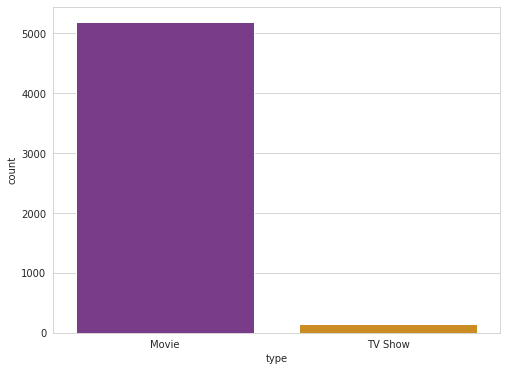

In [186]:
plt.rcParams['figure.figsize']=8,6
sns.set_style("whitegrid")
sns.countplot(data=df,x='type',palette='CMRmap')
plt.show()

#### Conclusion : As can be seen in the above graph, Less than 500 TV Shows have released on Netflix where as the Movies count is greater than 5000

In [ ]:
df['cast'].value_counts()

Samuel West                                                                                                                                                                                                        10
Jeff Dunham                                                                                                                                                                                                         7
Kevin Hart                                                                                                                                                                                                          6
Bill Burr                                                                                                                                                                                                           5
Jim Gaffigan                                                                                                                                    

---

lot of people have worked together in a movie/ show as cast so it is not wise to find the unique values of the `cast` column. However, it would be interested to know the movies / shows of our favourite actors and actresses

In [173]:
print(df['country'].value_counts())
pd.set_option('display.max_rows', 1000)

United States                                                                          1846
India                                                                                   875
United Kingdom                                                                          183
Canada                                                                                  107
Spain                                                                                    91
Egypt                                                                                    90
Nigeria                                                                                  88
Japan                                                                                    83
Turkey                                                                                   79
Indonesia                                                                                76
Philippines                                                                     

In [176]:
country=df['country'].value_counts().head()

### Graph 3 : top 5 countries where movies/shows are produced


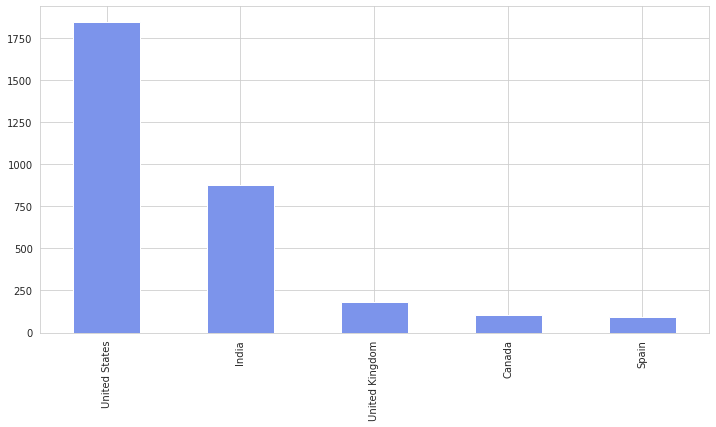

In [187]:
#top 5 countries where movies/shows are produced

plt.rcParams['figure.figsize']=12,6
country.plot(kind='bar', color='#7c94eb')
plt.show()


#### Conclusion: Unite States, India and United Kingdom are top three countries in producing movies and shows. However a very large part of movies come alone from US and India aone

In [17]:
df['year']=df['date_added'].apply(lambda x: x.year)
df['year']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
5330    2016
5331    2019
5332    2019
5333    2020
5334    2019
Name: year, Length: 5332, dtype: int64

In [ ]:
df['year'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2009, 2008, 2010])

We have data from 2010 to 2021...

---

### Graph 4 : year in which most of the movies/shows were added to netflix

In [195]:
#in which year most of the movies/shows were added to netflix


fig=px.bar(df['year'].value_counts(),labels={'index':'Year'})


fig.show()


#### Coclusion: There are very less number of movies released on netflix from year 2008 to year 2015. After 2016 a large number of movies/shows got released on the platform, the visualization shows in the year 2019 most movies/shows were released on Netflix.. However the rate dropped after 2019 that is in 2020 and 2021

In [ ]:
df.release_year=df.release_year.astype('int32')

### difference in release year and added year

In [200]:
#difference in release year and added year

diff=df['year'] - df['release_year']
print(diff.sort_values(ascending=False))

pd.set_option('display.max_rows', 1000)

4904    75
5217    73
4223    72
4269    71
5180    70
        ..
1066     0
1067     0
4110    -1
2962    -1
4144    -3
Length: 5332, dtype: int64


#### Conclusion: Some movies got released on Netflix after 75 years of their actual release date

In [ ]:
df['rating'].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [210]:
df.rating.value_counts()

TV-MA       1822
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: rating, dtype: int64

### Graph 5 : Ratings of most movies/show

In [211]:
fig=px.bar(df.rating.value_counts())
fig.show()

#### Conclusion: Most movies have `TV-MA`, `TV-14`, `R`... rating. Less than 200 movies/shows have `G` rating

In [ ]:
df['duration'].unique()

array(['125 min', '9 Seasons', '104 min', '127 min', '166 min', '103 min',
       '97 min', '106 min', '96 min', '124 min', '116 min', '98 min',
       '91 min', '115 min', '122 min', '99 min', '88 min', '100 min',
       '102 min', '93 min', '95 min', '85 min', '83 min', '182 min',
       '147 min', '90 min', '128 min', '143 min', '119 min', '114 min',
       '118 min', '108 min', '117 min', '121 min', '142 min', '113 min',
       '154 min', '120 min', '82 min', '94 min', '109 min', '101 min',
       '105 min', '86 min', '229 min', '76 min', '89 min', '110 min',
       '156 min', '112 min', '129 min', '107 min', '1 Season', '135 min',
       '136 min', '165 min', '150 min', '133 min', '145 min', '92 min',
       '2 Seasons', '64 min', '59 min', '111 min', '87 min', '148 min',
       '189 min', '141 min', '130 min', '7 Seasons', '68 min', '131 min',
       '126 min', '155 min', '123 min', '84 min', '4 Seasons', '13 min',
       '77 min', '74 min', '49 min', '72 min', '78 min', '70 min'

In [ ]:
df['listed_in'].unique()

array(['Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Dramas, International Movies',
       'Comedies, International Movies, Romantic Movies', 'Comedies',
       'Horror Movies, Sci-Fi & Fantasy', 'Thrillers',
       'Action & Adventure, Dramas',
       'Action & Adventure, Classic Movies, Dramas',
       'Dramas, Horror Movies, Thrillers',
       'Action & Adventure, Horror Movies, Thrillers',
       'Action & Adventure', 'Dramas, Thrillers',
       'Action & Adventure, Anime Features, International Movies',
       'Action & Adventure, Comedies, Dramas',
       'Sci-Fi & Fantasy, Thrillers',
       'Children & Family Movies, Comedies',
       'Documentaries, Music & Musicals',
       'Children & Family Movies, Dramas',
       'Dramas, International Movies, Thrillers',
       'Dramas, Romantic Movies', 'Comedies, Dramas, Independent Movies',
       'Dramas, International Movies, Romantic Movies', 'Dramas',
       '

### Total Genres 

In [23]:
genre_list=[]
def genre(column):
  for value in df[column]:
   names=value.split(', ')
   for i in names:
    if i not in genre_list:
      genre_list.append(i)
  return genre_list



In [24]:
print(genre('listed_in'))

['Dramas', 'Independent Movies', 'International Movies', 'British TV Shows', 'Reality TV', 'Comedies', 'Romantic Movies', 'Horror Movies', 'Sci-Fi & Fantasy', 'Thrillers', 'Action & Adventure', 'Classic Movies', 'Anime Features', 'Children & Family Movies', 'Documentaries', 'Music & Musicals', 'Cult Movies', 'Faith & Spirituality', 'LGBTQ Movies', 'Crime TV Shows', 'International TV Shows', 'TV Dramas', 'Romantic TV Shows', 'Spanish-Language TV Shows', 'Stand-Up Comedy', 'TV Shows', 'Movies', 'TV Comedies', 'Sports Movies', 'TV Action & Adventure', 'TV Sci-Fi & Fantasy', 'TV Mysteries', 'Docuseries', 'Anime Series', 'TV Horror', 'Teen TV Shows', 'Korean TV Shows', 'Stand-Up Comedy & Talk Shows', "Kids' TV", 'Classic & Cult TV', 'TV Thrillers', 'Science & Nature TV']


In [ ]:
print(len(genre('listed_in')))

42


#### Conclusion: There are 42 Genres in total which include ***Dramas***, ***Independent movies***, ***Comedies***, ***Romantic Movies*** ....

### Graph 6 : Genre Word Cloud

In [23]:
text=''
for i in df.listed_in:
  lis=i.split(', ')
  text += ' ' + ' '.join(lis)
  

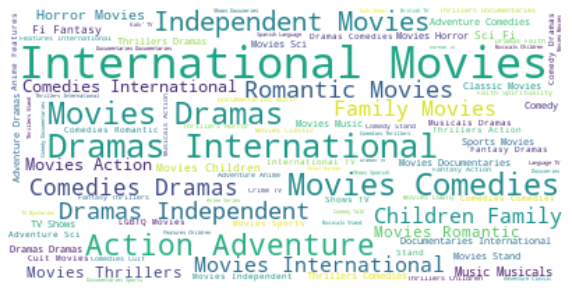

In [28]:
plt.rcParams['figure.figsize']=10,9
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Conclusion: Movies of International Movies, Dramas, Comedies, Action, Adventure... genre appears the most 

### Get movies of particular genre 

In [25]:
def movies(genre):
  return df[df['listed_in'].apply(lambda x: True if(genre in x) else False)]['title']


In [26]:
movies('Dramas')

0                   Sankofa
2              The Starling
3              Je Suis Karl
8       Birth of the Dragon
9                      Jaws
               ...         
5328               Zed Plus
5329                  Zenda
5330                Zinzana
5331                 Zodiac
5334                 Zubaan
Name: title, Length: 2345, dtype: object

In [ ]:
movies('Cult Movies')

43                           Blade Runner: The Final Cut
55                                           House Party
56                                         House Party 2
62                                             Labyrinth
67                                         Mars Attacks!
                              ...                       
5133                         The Texas Chainsaw Massacre
5183    To Wong Foo, Thanks for Everything! Julie Newmar
5193                                       Trainspotting
5198                                             Tremors
5328                                              Zodiac
Name: title, Length: 69, dtype: object

In [ ]:
movies('Thrillers')

7                Paranoia
10                 Jaws 2
11                 Jaws 3
12      Jaws: The Revenge
14           Training Day
              ...        
5281        White Chamber
5282         White Island
5296     Would You Rather
5327              Zinzana
5328               Zodiac
Name: title, Length: 550, dtype: object



> Note: one movie can fall into different genres




### Get actors/actresses country wise

In [45]:
# country wise cast

def cast_country_wise(country,type_):

  cast_list=[]

  for i in df[(df['country']==country) & (df['type']==type_)]['cast']:

    names=i.split(', ')

    for name in names:

      if name not in cast_list:

        cast_list.append(name)

  cast_list.sort()

  return cast_list



In [118]:
cast_country_wise('India','Movie')

['A.K. Hangal',
 'A.S. Sasi Kumar',
 'Aabhas Yadav',
 'Aadarsh Balakrishna',
 'Aadhi',
 'Aadil Khan',
 'Aaditi Pohankar',
 'Aaditya Pratap Singh',
 'Aadukalam Naren',
 'Aadya Bedi',
 'Aakash Dabhade',
 'Aakash Dahiya',
 'Aakash Pandey',
 'Aakshath Das',
 'Aamir Ahmed',
 'Aamir Bashir',
 'Aamir Khan',
 'Aanand Kale',
 'Aanchal Munjal',
 'Aarav Khanna',
 'Aarjav Trivedi',
 'Aarohi Patel',
 'Aarti Chhabria',
 'Aarti Patel',
 'Aarubala',
 'Aarushi Sharma',
 'Aarya Dave',
 'Aaryan Menon',
 'Aasha Pawar',
 'Aashay Kulkarni',
 'Aashi Rawal',
 'Aashif Sheikh',
 'Aashish Chaudhary',
 'Aashish Kulkarni',
 'Aayam Mehta',
 'Aayan Boradia',
 'Abbas',
 'Abdur Rehman',
 'Abeer Abrar',
 'Abhay Deol',
 'Abhay Kulkarni',
 'Abhay Mahajan',
 'Abhijit Kelkar',
 'Abhijit Sinha',
 'Abhimanyu Dassani',
 'Abhimanyu Singh',
 'Abhinav Gomatam',
 'Abhishek Bachchan',
 'Abhishek Banerjee',
 'Abhishek D Shah',
 'Abhishek Duhan',
 'Abhishek Kale',
 'Abhishek Rawat',
 'Abhishek Saha',
 'Abir Chatterjee',
 'Abir Goswa

In [63]:
cast_country_wise('United States','Movie')

[' Jr.',
 '2Mex',
 '50 Cent',
 'A.J. Johnson',
 'A.J. LoCascio',
 'AJ Bowen',
 'Aaron Blakely',
 'Aaron Douglas',
 'Aaron Eckhart',
 'Aaron Eisenberg',
 'Aaron Farb',
 'Aaron Guy',
 'Aaron Himelstein',
 'Aaron McCusker',
 'Aaron Michael Drozin',
 'Aaron Moorhead',
 'Aaron Munoz',
 'Aaron Paul',
 'Aaron Pearl',
 'Aaron Stanford',
 'Aaron Taylor-Johnson',
 'Aaron Washington',
 'Aaron Yoo',
 'Aarti Mann',
 'Aasif Mandvi',
 'Abbey Lee',
 'Abbi Jacobson',
 'Abby Donnelly',
 'Abby Quinn',
 'Abby Ryder Fortson',
 'Abby Trott',
 'Abdellah Bensaid',
 'Abe Vigoda',
 'Abel Franco',
 'Abel McSurely Bradshaw',
 'Abel Tesfaye',
 'Abella Bala',
 'Abella Wyss',
 'Abigail Breslin',
 'Abigail Pniowsky',
 'Abigail Spencer',
 'Abraham Attah',
 'Abraham Benrubi',
 'Abstract Rude',
 'Ace Harney',
 'Adam Arkin',
 'Adam Baldwin',
 'Adam Barrett',
 'Adam Beach',
 'Adam Bessa',
 'Adam Boyer',
 'Adam Brody',
 'Adam Busch',
 'Adam Chernick',
 'Adam David Thompson',
 'Adam DeVine',
 'Adam Demos',
 'Adam Devine',
 

### Get director country wise

In [70]:
def get_director(country):
  return df[df['country']==country]['director'].unique()


print(get_director('United States'))

pd.set_option('display.max_rows', 1000
              )

['Theodore Melfi' 'Dennis Dugan' 'Scott Stewart' ... 'Lawrence Kasdan'
 'Raja Gosnell' 'Peter Hewitt']


### Understanding what content is available in different countries

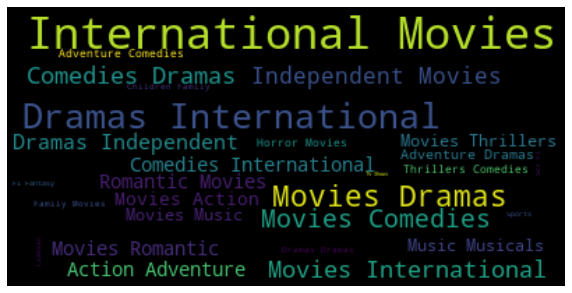

In [48]:
def content(country):
  text=''
  for i in df[df['country']==country]['listed_in']:
    lis=i.split(', ')
    text += ' ' + ' '.join(lis)

  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()
  
content('India')

#### Conclusion: Movies of genre International Movies, Dramas, Comedies, Action Adventure are produced/ watched more

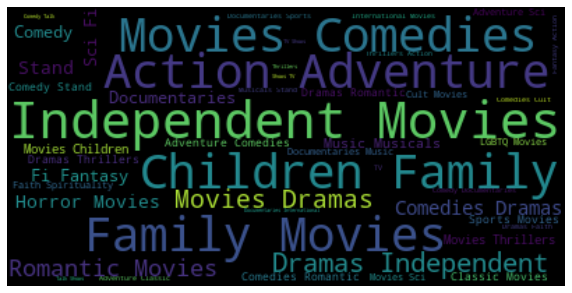

In [49]:
content('United States')

#### In United States Family movies, Comedies, Independent movies are produced/watched more

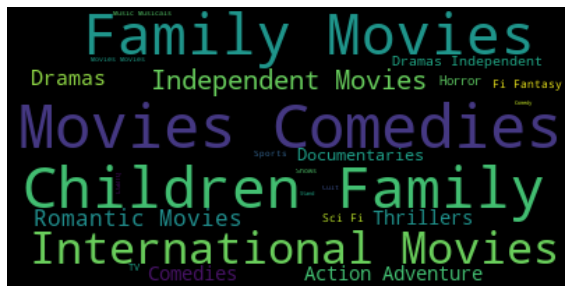

In [50]:
content('Canada')


---

In [33]:
from PIL import Image

In [38]:
india_mask = np.array(Image.open('/content/india map.jpg'))

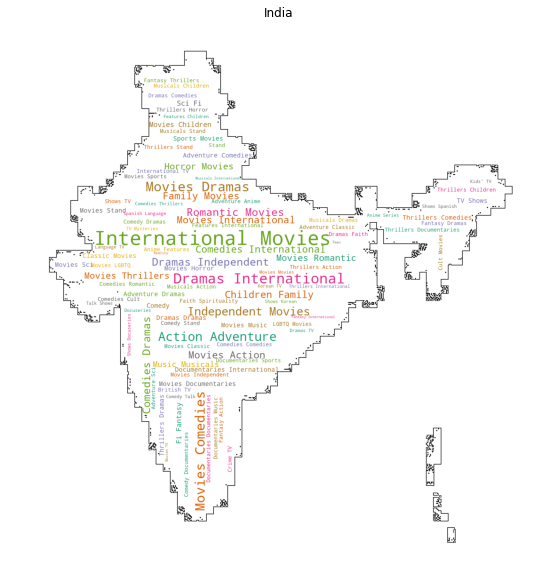

In [47]:
def generate_wordcloud(data, title, mask=None):
    cloud = WordCloud(scale=3,
                      colormap='Dark2',
                      mask=mask,
                      background_color='white',
                      collocations=True,
                      contour_color='black',
                      contour_width=0.1).generate_from_text(data)
    plt.figure(figsize=(12,10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
    
   
generate_wordcloud(text, 'India', mask=india_mask)

In [56]:
df_movies=df[df['type']=='Movie']
df_movies.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
2,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021
3,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021
4,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021
5,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021


In [71]:
df_movies.drop(columns='type',axis=1,inplace=True)

In [72]:
df_movies.reset_index(drop=True,inplace=True)

In [74]:
df_movies.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
0,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
1,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021
2,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021
3,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021
4,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021


In [78]:
df_movies['duration']=df_movies['duration'].apply(lambda x : str(x).replace(' min',''))

In [80]:
df_movies['duration']=pd.to_datetime(df_movies.duration, unit='m').dt.strftime('%H:%M')

In [82]:
df_movies.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
0,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,02:05,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
1,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,01:44,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021
2,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,02:07,"Dramas, International Movies",After most of her family is murdered in a terr...,2021
3,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,02:46,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021
4,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,01:43,Comedies,Mourning the loss of their beloved junior high...,2021


In [83]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         5185 non-null   object        
 1   director      5185 non-null   object        
 2   cast          5185 non-null   object        
 3   country       5185 non-null   object        
 4   date_added    5185 non-null   datetime64[ns]
 5   release_year  5185 non-null   int64         
 6   rating        5185 non-null   object        
 7   duration      5185 non-null   object        
 8   listed_in     5185 non-null   object        
 9   description   5185 non-null   object        
 10  year          5185 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 445.7+ KB


### Movies with `G rating`

In [85]:
df[df['rating']=='G']['title']

34                                       A Champion Heart
418                                   Hachi: A Dog's Tale
529                                          My Fair Lady
1595                 A Shaun the Sheep Movie: Farmageddon
1679                                 Garfield's Pet Force
1682                            Jimmy Neutron: Boy Genius
1889                          Rugrats in Paris: The Movie
1890                                    The Rugrats Movie
1928                          Spookley the Square Pumpkin
2349                                      The Pixar Story
2657                                 Pup Star: World Tour
2894                               Ghost of the Mountains
3092                                      Growing Up Wild
3093                       Tini: The New Life of Violetta
3182                                             Pup Star
3437                                All Dogs Go to Heaven
3464                                     An American Tail
3465          

### Latest movies(released in 2021 and 2020)

In [93]:
#latest movies
print(df_movies[(df_movies['year']==2021) | (df_movies['year']==2020)]['title'])

pd.set_option('display.max_rows', 1000)

0                                   Sankofa
1                              The Starling
2                              Je Suis Karl
3                                     Jeans
4                                 Grown Ups
                       ...                 
5139                         Wild Wild West
5140                               Wildlife
5141    Willy Wonka & the Chocolate Factory
5152                             Wyatt Earp
5183                                   Zoom
Name: title, Length: 1880, dtype: object


### Get movies of particular actor/actress

In [150]:
#search movies of your favourite actor/actress

def fav_actors(name):
  for i in df_movies['cast']:
    if name in i:
      print('Movies:')
      movies= df_movies.loc[df_movies['cast'].apply(lambda x : True if (name in x) else False),'title']
      return movies.to_string(index=False)
  else:
      return f'No movies of {name} found in database'


In [143]:
print(fav_actors('Aishwarya Rai'))

Movies:
                    Jeans
           Action Replayy
                    Shabd
             Jodhaa Akbar
                Guzaarish
                     Guru
Hamara Dil Aapke Paas Hai
         Kyun! Ho Gaya Na
                     Taal


In [144]:
print(fav_actors('Abhishek'))

Movies:
           Kyaa Kool Hain Hum 3
        Shootout at Lokhandwala
                   The Disciple
                Ajeeb Daastaans
                   BluffMaster!
                           Ludo
                        Players
                        Dostana
         Kabhi Alvida Naa Kehna
          Motichoor Chaknachoor
                  Made in China
                           Game
                          Stree
Ek Ladki Ko Dekha Toh Aisa Laga
                       Taramani
                    Katti Batti
                        Delhi 6
                           Ajji
                           Guru
                           Yuva
                    Un plus une
                 Happy New Year
                            Run
                       Shararat
                         Thithi


In [145]:
print(fav_actors('Vicky Kaushal'))

Movies:
    Raman Raghav 2.0
               Sanju
        Lust Stories
Love Per Square Foot
              Zubaan


In [146]:
print(fav_actors('Alia Bhatt'))

Movies:
Humpty Sharma Ki Dulhania
            Kapoor & Sons
              Magnificent
                 2 States
                  Highway
             Dear Zindagi
              Udta Punjab


In [147]:
print(fav_actors('Katrina Kaif'))

Movies:
Ajab Prem Ki Ghazab Kahani
                   Welcome
            Bombay Talkies
  Zindagi Na Milegi Dobara
              Jagga Jasoos
                   Phantom
                      Race
                    Fitoor
                 Raajneeti
           Namastey London
                      Boom
    Humko Deewana Kar Gaye
     Maine Pyaar Kyun Kiya
            Tees Maar Khan


In [148]:
print(fav_actors('Saif Ali'))

Movies:
        Kal Ho Naa Ho
Together For Eternity
       Dil Chahta Hai
              Baazaar
              Kurbaan
              Phantom
                 Race
               Race 2
          Yaar Gaddar
         Aashik Awara
              Rangoon
            Aarakshan
       Darna Mana Hai
        Ek Hasina Thi
 Hum Saath-Saath Hain
            Kya Kehna


In [151]:
print(fav_actors('Shahrukh'))

No movies of Shahrukh found in database


In [152]:
print(fav_actors('Salman'))

Movies:
                           Hello Brother
                               Bodyguard
                            Dedh Ishqiya
                                 Ishqiya
                    Prem Ratan Dhan Payo
                         Andaz Apna Apna
                       Si Doel the Movie
                          Organize Isler
                      Kuch Kuch Hota Hai
                               Paharganj
                     Hum Aapke Hain Koun
                   Together For Eternity
                        Teefa in Trouble
                ABCD: Any Body Can Dance
                   Main aurr Mrs. Khanna
                         Mumbai Cha Raja
                          Chal Mere Bhai
                                Hokkabaz
                    Hum Saath-Saath Hain
Jaan-E-Mann: Let's Fall in Love... Again
                                  Judwaa
                 Lucky: No Time for Love
                   Maine Pyaar Kyun Kiya
                         Maine Pyar Kiya
        

### Search Movies by directors

In [207]:
#search by your favourite directors


def fav_directors(name):
  for i in df_movies['director']:
    if name in i:
      print('Movies:')
      movies= df_movies.loc[df_movies['director'].apply(lambda x : True if (name in x) else False),'title']
      return movies.to_string(index=False)
  else:
      return f'No movies of {name} found in database'


In [209]:
print(fav_directors('Imtiaz'))

Movies:
         Jab We Met
       Love Aaj Kal
            Highway
            Tamasha
Jab Harry Met Sejal
       Socha Na Tha


### Graph 7 : Seasons of TV Shows

In [242]:
df_tv_show = df.loc[df['type'] == 'TV Show']
df_tv_show['duration'] = df_tv_show['duration'].str.replace(' Seasons', ' Season(s)')


df_ = pd.DataFrame(data=df_tv_show.groupby('duration').size().reset_index())
df_.rename(columns={0: 'Number of TV Show'}, inplace=True)

fig = px.pie(df_, values='Number of TV Show', names='duration',
             color_discrete_sequence=px.colors.sequential.RdBu, title='Seasons of TV Shows')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### Conclusion: Most of the TV Shows have only 1 season 

---
Conclusion summary
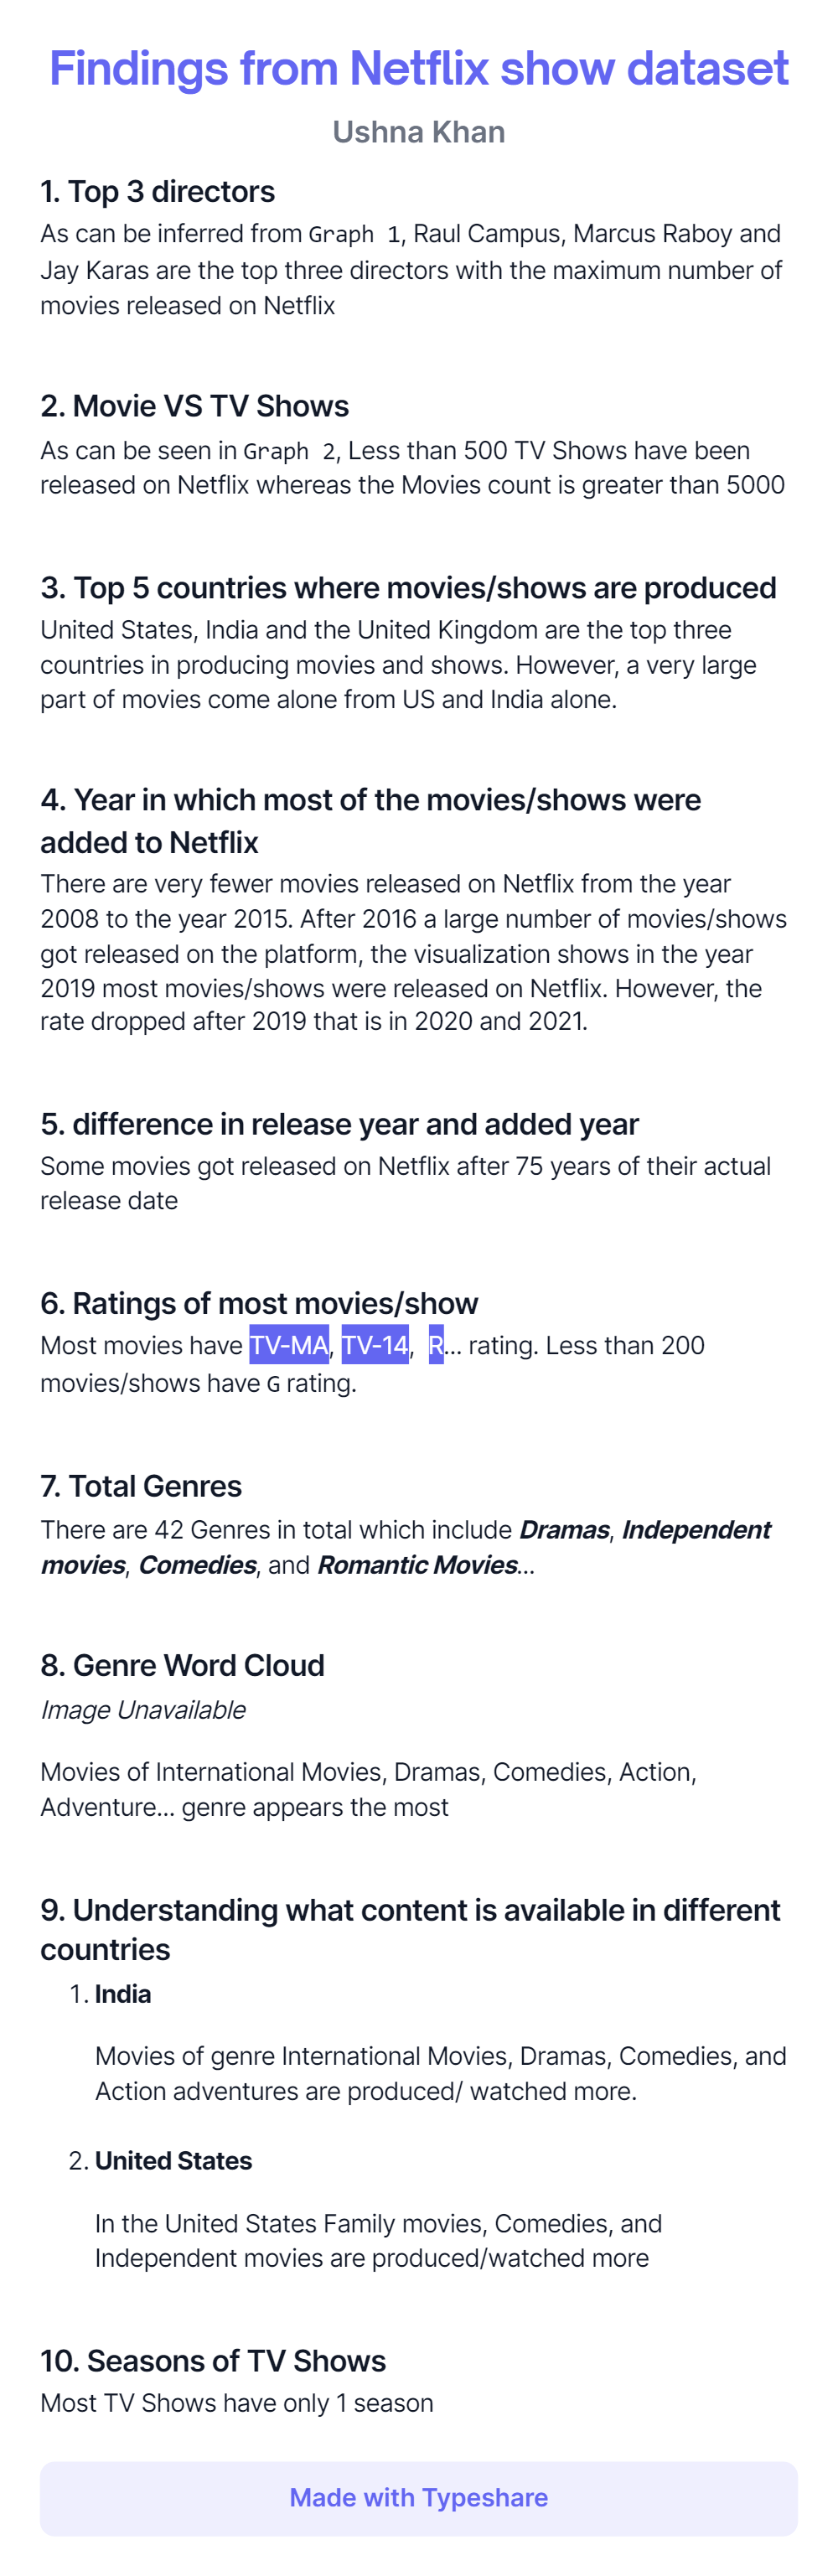